<h1>Lotka-Volterra dinamikas modelis</h1>
* * *
<p>Darba uzdevums ir izveidot Lotka-Volterra plēsēja un medījuma modeli</p>
* * *
<h1>Matemātiskais vienādojums</h1>
<h3>Medījuma skaita dinamikas vienādojums</h3>
$$
\frac{dx}{dt}=Ax-Bxy
$$
<h3>Plēsēju skaita dinamikas vienādojums</h3>
$$
\frac{dy}{dt}=Cxy-Dy
$$
<p>,kur <br>
    x(t) ir upuru populācijas blīvums laikā t <br>
    y(t) ir plēsēju populācijas blīvums laikā t<br>
    dx/dt and dy/dt ir izmaiņu ātrums, attiecīgi x un y <br>
    A- Medījamo dzīvnieku dzimstība <br>
    B- Medījamo dzīvnieku mirstība<br>
    C- Plēsēju dzimstība <br>
    D- Plēsēju mirstība

</p>

In [548]:
from IPython.display import HTML, display
display(HTML(""))

<h2>Izmantotie dzīvnieku piemēri:Lācis-Zivs</h2>
<table>
   <tr>
      <td><img src='https://imgs.mongabay.com/wp-content/uploads/sites/20/2020/10/02064909/Sweden-ecotourism-02-copy-copy-1-768x450.jpg' width=700></td>
      <td><img src='https://animals.net/wp-content/uploads/2019/12/Salmon-3-650x425.jpg' width=640></td>
   </tr>
</table>

<h2>Modelis</h2>

In [549]:

from matplotlib.pyplot import figure    # Komandas figure izmantošanai
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
#Mainīgie
x0=6 #Sākotnējais medījuma skaits
y0=3 #Sākotnējais plēsēju skaits
A=1#Medījamo dzīvnieku dzimstība
B=0.1 #Medījamo dzīvnieku mirstība
C=0.75 #Plēsēju dzimstība
D= 1.5#Plēsēju mirstība
dt=0.01 #Laika solis

<h2>Funkcijas</h2>

In [550]:
#Funkcijas vienāojuma atrisināšanai
#definē kā tiek noteikta medījuma skaita izmaiņa laikā
def preyNum(cpreyN,cpredatorN):
    deltaX=0
    deltaX=(A*cpreyN-B*cpreyN*cpredatorN)*dt #medījuma(mainīgā) skaita izmaiņas laikā
    newX=cpreyN + deltaX #jaunais medījuma skaits
    return newX
#definē kā tiek noteikta plēsēju skaita izmaiņa laikā
def predatorNum(cpreyN,cpredatorN):
    deltaY=0
    deltaY=(C*cpreyN*cpredatorN-D*cpredatorN)*dt #mainīgā plēsēju skaita izmaiņa
    newY=cpredatorN + deltaY #jaunais plēsēju skaits
    return newY

In [551]:
#Vienādojuma simulācija, Funkcijas parametru un dzīvnieku skaita saraksta definēšana.
def simulation(initX,initY,processDur):
    x=initX
    y=initY
    
    New_x=0
    New_y=0
    
    X=np.arange(processDur, dtype=float)
    Y=np.arange(processDur, dtype=float)
#Vērtības simuālcijai tiek atjaunotas
    for i in range (1,processDur):
        New_x=preyNum(x,y)
        New_y=predatorNum(x,y)
       
        X[i]=New_x
        Y[i]=New_y
        x=New_x
        y=New_y
    return X,Y

<h2>Garfiks</h2>

In [552]:
#Tiek veidots iepriekš izveidotā modeļa garfiks
def visualize(Xresults,Yresults):
    plt.plot(Xresults, 'darkgreen')
    plt.plot(Yresults, 'darkseagreen')
    plt.title('Lotka-Volterra modelis: Lāči-Zivis')
    plt.ylabel('Dzīvnieku populācija')
    plt.xlabel('Laiks')
    #izēlēta katras līknes krāsa un noskaumus
    pleseji_graph = mpatches.Patch(color='darkgreen', label='plēsēji')
    medijums_graph= mpatches.Patch(color='darkseagreen', label='medījums')
    plt.legend(handles=[pleseji_graph,medijums_graph])
    #iestatīti izmēri
    plt.gca().xaxis.grid(True) 
    plt.gca().yaxis.grid(True)
    figure(figsize=(80,40))      
    return
    


(array([6.042     , 6.08375022, 6.12521905, ..., 0.18195139, 0.18376094,
        0.18558863]),
 array([3.09      , 3.18367335, 3.2811833 , ..., 0.05476364, 0.05401692,
        0.05328111]))

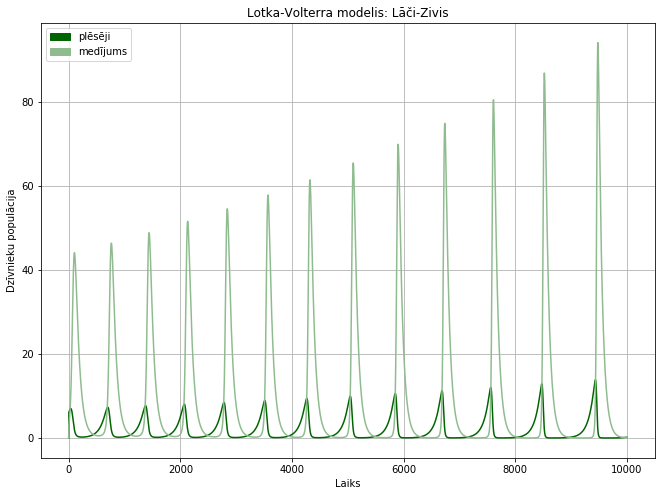

<Figure size 5760x2880 with 0 Axes>

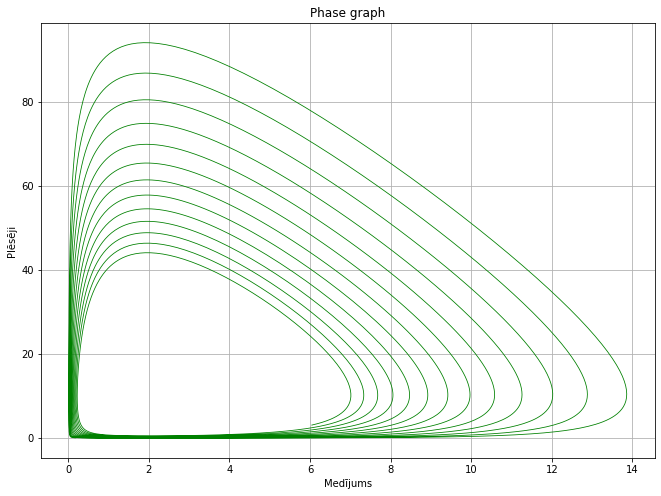

<Figure size 4320x1440 with 0 Axes>

In [553]:
def visualizePhaseGraph(resultX, resultY):
    resultX= resultX[resultX!=0]
    resultY= resultY[resultY!=0]
    plt.figure()
    plt.plot(resultX,resultY, 'g-', linewidth=0.8)
    plt.title("Phase graph")
    plt.xlabel("Medījums")
    plt.ylabel("Plēsēji")
    plt.gca().xaxis.grid(True) 
    plt.gca().yaxis.grid(True)
    figure(figsize=(60,20))
    return resultX, resultY

T=10000                                
resultX, resultY = simulation(x0,y0,T)
visualize(resultX,resultY)
visualizePhaseGraph(resultX,resultY)

<h2>Uzdevums</h2>
<p>Tiek mainīti iepriekš pieņemtie nosacījumi un pievienoti papildparametri. <br>
</p>

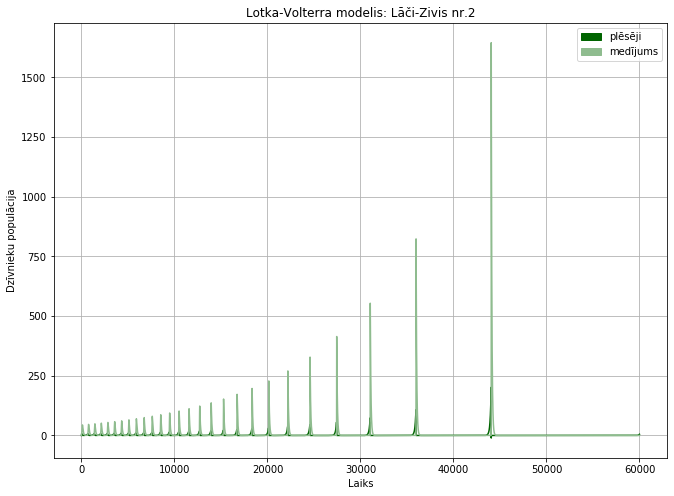

<Figure size 5760x2880 with 0 Axes>

In [554]:
def visualize(Xresults,Yresults):
    plt.plot(Xresults, 'darkgreen')
    plt.plot(Yresults, 'darkseagreen')
    plt.title('Lotka-Volterra modelis: Lāči-Zivis nr.2')
    plt.ylabel('Dzīvnieku populācija')
    plt.xlabel('Laiks')
    #izēlēta katras līknes krāsa un noskaumus
    pleseji_graph = mpatches.Patch(color='darkgreen', label='plēsēji')
    medijums_graph= mpatches.Patch(color='darkseagreen', label='medījums')
    plt.legend(handles=[pleseji_graph,medijums_graph])
    #iestatīti izmēri
    plt.gca().xaxis.grid(True) 
    plt.gca().yaxis.grid(True)
    figure(figsize=(80,40))      
    return
T=60000                                
resultX, resultY = simulation(x0,y0,T)
visualize(resultX,resultY)

<p>Palielinot laika parametro no 10000 līdz 60000 var secināt, ka modelis pēc laika posma ~44000 vairs nespēj funkcionēt un abas sugas izmirst. Laika posmu, kurā sugas izmirst iespējams varētu mainīt pamainot sākuma parametrus, taču tās tapat noteiktā laika posmā izmirtu.</p>

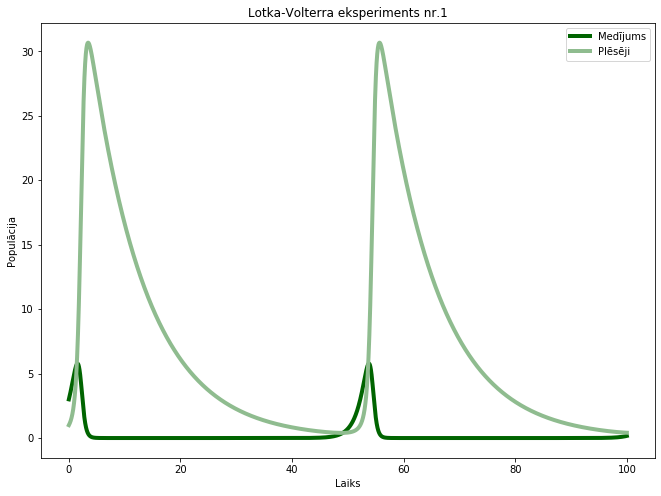

In [555]:
from matplotlib.pyplot import figure    # Komandas figure izmantošanai
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
#Mainīgie
x=3 #Sākotnējais medījuma skaits
y=1 #Sākotnējais plēsēju skaits
A=0.7#Medījamo dzīvnieku dzimstība
B=0.1 #Medījamo dzīvnieku mirstība
C=0.3 #Plēsēju dzimstība
D=0.1#Plēsēju mirstība
dt=0.01 #Laika solis
T=100
t=0

#tiek definēti tukši saraksti
laika_list=[]
med_list=[]
ple_list=[]

#tiem tiek piešķirtas vērtības
laika_list.append(t)
med_list.append(x)
ple_list.append(y)

while t<T:
    
    #tiek aprēķinātas jaunās vērtības un katra nākamā vērtība tiek iegūta laikam pieskaitot noteikto laika soli
    t=t+dt 
    x=x+((A*x-B*x*y)*dt) 
    y=y+((C*x*y-D*y)*dt)
#rezultāti no vienādojumiem tiek pievienoti izveidotajiem tukšajiem sarakstiem
    laika_list.append(t)
    med_list.append(x)
    ple_list.append(y)

#Grafiks 
plt.title('Lotka-Volterra eksperiments nr.1')
plt.xlabel('Laiks')
plt.ylabel('Populācija')
graph=plt.plot(laika_list,med_list,'darkgreen', laika_list,ple_list,'darkseagreen', linewidth = 4) 
plt.legend(['Medījums','Plēsēji'])

<p>Neskatoties uz to, ka sākuma parametros medījuma bija vairāk nekā plēsēju, šādi izmainot pārējos parametrus , var redzēt, ka plēsēji ļoti ātri savairojas, taču tik pat ātri izmirst, jo medījums ir stagnants un nespēj savairoties. Pēc laika ~55, modelis cikliski atkārtojas un norit tas pats.</p>

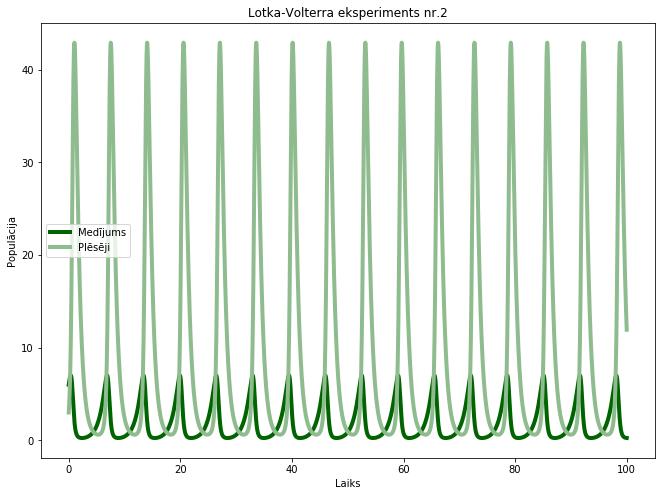

In [556]:
from matplotlib.pyplot import figure    # Komandas figure izmantošanai
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
#Mainīgie
x=6 #Sākotnējais medījuma skaits
y=3 #Sākotnējais plēsēju skaits
A=1#Medījamo dzīvnieku dzimstība
B=0.1 #Medījamo dzīvnieku mirstība
C=0.75 #Plēsēju dzimstība
D= 1.5#Plēsēju mirstība
dt=0.01 #Laika solis
T=100
t=0

#tiek definēti tukši saraksti
laika_list=[]
med_list=[]
ple_list=[]

#tiem tiek piešķirtas vērtības
laika_list.append(t)
med_list.append(x)
ple_list.append(y)

while t<T:
    
    #tiek aprēķinātas jaunās vērtības un katra nākamā vērtība tiek iegūta laikam pieskaitot noteikto laika soli
    t=t+dt 
    x=x+((A*x-B*x*y)*dt) 
    y=y+((C*x*y-D*y)*dt)
#rezultāti no vienādojumiem tiek pievienoti izveidotajiem tukšajiem sarakstiem
    laika_list.append(t)
    med_list.append(x)
    ple_list.append(y)

#Grafiks 
plt.title('Lotka-Volterra eksperiments nr.2')
plt.xlabel('Laiks')
plt.ylabel('Populācija')
graph=plt.plot(laika_list,med_list,'darkgreen', laika_list,ple_list,'darkseagreen', linewidth = 4) 
plt.legend(['Medījums','Plēsēji'])

<p>Pēc grafika var secināt, ka norit tādi paši procesi, kā pirmajā eksperimentā, taču vienam ciklam tiek iziets cauri daudz ātrāk. Šoreiz tas ir nevis ~55, bet ~5</p>

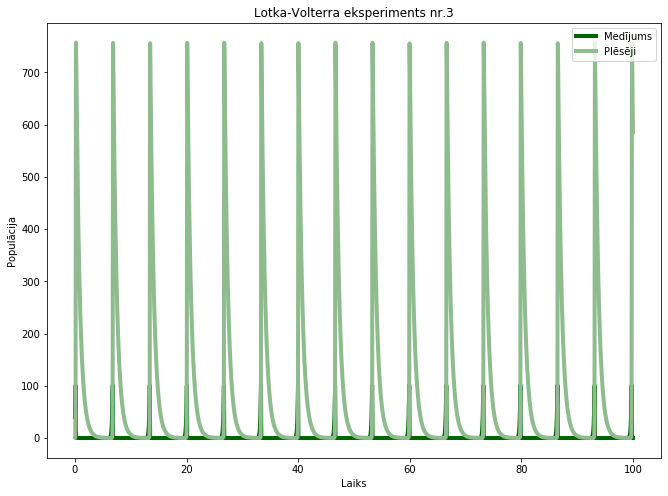

In [557]:
from matplotlib.pyplot import figure    # Komandas figure izmantošanai
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
#Mainīgie
x=40 #Sākotnējais medījuma skaits
y=1 #Sākotnējais plēsēju skaits
A=10#Medījamo dzīvnieku dzimstība
B=0.1 #Medījamo dzīvnieku mirstība
C=0.75 #Plēsēju dzimstība
D= 1.5#Plēsēju mirstība
dt=0.01 #Laika solis
T=100
t=0

#tiek definēti tukši saraksti
laika_list=[]
med_list=[]
ple_list=[]

#tiem tiek piešķirtas vērtības
laika_list.append(t)
med_list.append(x)
ple_list.append(y)

while t<T:
    
    #tiek aprēķinātas jaunās vērtības un katra nākamā vērtība tiek iegūta laikam pieskaitot noteikto laika soli
    t=t+dt 
    x=x+((A*x-B*x*y)*dt) 
    y=y+((C*x*y-D*y)*dt)
#rezultāti no vienādojumiem tiek pievienoti izveidotajiem tukšajiem sarakstiem
    laika_list.append(t)
    med_list.append(x)
    ple_list.append(y)

#Grafiks 
plt.title('Lotka-Volterra eksperiments nr.3')
plt.xlabel('Laiks')
plt.ylabel('Populācija')
graph=plt.plot(laika_list,med_list,'darkgreen', laika_list,ple_list,'darkseagreen', linewidth = 4) 
plt.legend(['Medījums','Plēsēji'])

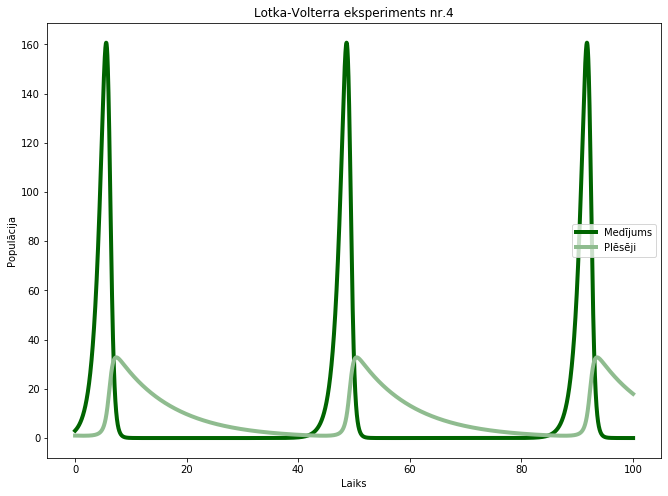

In [558]:
from matplotlib.pyplot import figure    # Komandas figure izmantošanai
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
#Mainīgie
x=3 #Sākotnējais medījuma skaits
y=1 #Sākotnējais plēsēju skaits
A=0.9#Medījamo dzīvnieku dzimstība
B=0.1 #Medījamo dzīvnieku mirstība
C=0.01 #Plēsēju dzimstība
D=0.1#Plēsēju mirstība
dt=0.01 #Laika solis
T=100
t=0

#tiek definēti tukši saraksti
laika_list=[]
med_list=[]
ple_list=[]

#tiem tiek piešķirtas vērtības
laika_list.append(t)
med_list.append(x)
ple_list.append(y)

while t<T:
    
    #tiek aprēķinātas jaunās vērtības un katra nākamā vērtība tiek iegūta laikam pieskaitot noteikto laika soli
    t=t+dt 
    x=x+((A*x-B*x*y)*dt) 
    y=y+((C*x*y-D*y)*dt)
#rezultāti no vienādojumiem tiek pievienoti izveidotajiem tukšajiem sarakstiem
    laika_list.append(t)
    med_list.append(x)
    ple_list.append(y)

#Grafiks 
plt.title('Lotka-Volterra eksperiments nr.4')
plt.xlabel('Laiks')
plt.ylabel('Populācija')
graph=plt.plot(laika_list,med_list,'darkgreen', laika_list,ple_list,'darkseagreen', linewidth = 4) 
plt.legend(['Medījums','Plēsēji'])

<p>Šajā ekperimentā tika nomainīti dzimstības parametri, lai atrastu modeli, kad medījumu skaits ir daudz lielāks nekā plēsēju. Plēsējiem dzimstības parametri tika uzlikti ļoti mazi, savukārt medījumiem, daudz lielāki.</p>

<p>Veicot eksperimentus un mainot esošos parametrus tika noskaidrots, ka viena vai otra suga nevar izmirt ar dotajiem pamata apstākļiem. Tas ir tāpēc, ka sistēma atkārtojas cikliski un neieviešot jaunus paramterus, tas nav iespējams. </p>

<p>Lai modelis būtu realistiskās un neparādītos tikai cikliski, var pievienot papildus parametrus. <br>
Carrying capacity parasti tiek izmantota ja modelī pievieno vēl vienu plēsēju, taču šoreiz tas tiks izmanots, lai modelētu izmaiņas tikai starp vienu plēseju sugu un vienu medījumu sugu.* <br>
K-Carrying capacity <br>
Izrietošais vienādojums:
    $$
\frac{dx}{dt}=Ax(1-\frac{x}{K})-Bxy
$$
*Izmantotais informācijas avots-https://github.com/dh4gan/lotka-volterra/blob/master/README.md 
</p>

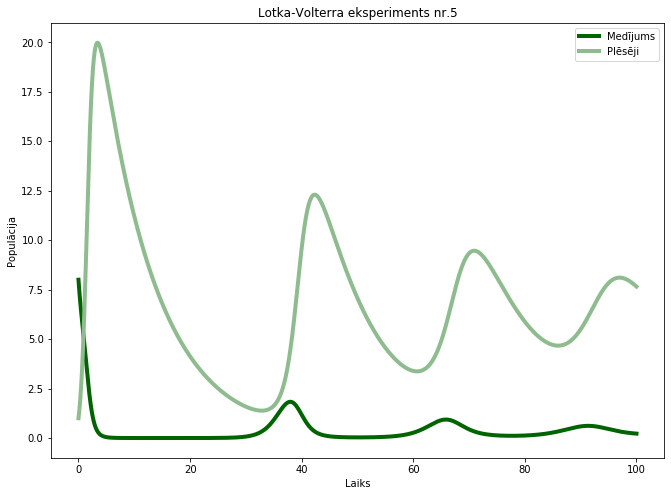

In [559]:
from matplotlib.pyplot import figure    
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
#Mainīgie
x=8 #Sākotnējais medījuma skaits
y=1 #Sākotnējais plēsēju skaits
A=0.7#Medījamo dzīvnieku dzimstība
B=0.1 #Medījamo dzīvnieku mirstība
C=0.3 #Plēsēju dzimstība
D=0.1#Plēsēju mirstība
dt=0.01 #Laika solis
T=100
t=0
k=5

#tiek definēti tukši saraksti
laika_list=[]
med_list=[]
ple_list=[]

#tiem tiek piešķirtas vērtības
laika_list.append(t)
med_list.append(x)
ple_list.append(y)

while t<T:
    
    #tiek aprēķinātas jaunās vērtības un katra nākamā vērtība tiek iegūta laikam pieskaitot noteikto laika soli
    t=t+dt 
    x=x+((A*x*(1-(x/k))-B*x*y)*dt) 
    y=y+((C*x*y-D*y)*dt)
#rezultāti no vienādojumiem tiek pievienoti izveidotajiem tukšajiem sarakstiem
    laika_list.append(t)
    med_list.append(x)
    ple_list.append(y)


#Grafiks 
plt.title('Lotka-Volterra eksperiments nr.5')
plt.xlabel('Laiks')
plt.ylabel('Populācija')
graph=plt.plot(laika_list,med_list,'darkgreen', laika_list,ple_list,'darkseagreen', linewidth = 4) 
plt.legend(['Medījums','Plēsēji'])

<p>Apskatot jauno modeli var redzēt, ka simulācija vairs nav cikliska, abu populāciju maksimums ir laikā ~4 un vēlāk tās samazinās. Pēc šāda modeļa, lai arī sākotnēji medījuma skaits ir daudz lielāks nekā plēsēju, tas tāpat pēc noteikta laika gadrīz pilnībā izmirst.</p>

